# Visualizing the Earth's dipolar magnetic field


https://scipython.com/blog/visualizing-the-earths-magnetic-field/

https://en.wikipedia.org/wiki/Dipole_model_of_the_Earth%27s_magnetic_field

The magnetic field at a point $\mathbf{r}$ due to a magnetic dipole moment $\mathbf{m}$

$$
\mathbf{B(\mathbf{r})} = \frac{\mu_0}{4\pi r^3}[3\hat{r}(\hat{r}\cdot\mathbf{m}) - \mathbf{m}]
$$

where $\mu_0$ is the vacuum permeability. In geomagnetism, it is usual to write the radial and angular components of $B$ as:

$$
B_r = -2 B_0 \left( \frac{R_E}{r} \right)^3\cos\theta,
$$

$$
B_\theta = - B_0 \left( \frac{R_E}{r} \right)^3\sin\theta,
$$

$$
B_\phi = 0,
$$

where $\theta$ is polar (colatitude) angle (relative to the magnetic North pole), $\phi$ is the azimuthal angle (longitude), and $R_E$ is the Earth's radius, about $6370 \text{ km}$. With this definition, $B_0$ denotes the magnitude of the mean value of the field at the magnetic equator on the Earth's surface, about $31.2 \text{ }\mu\text{T} = 0.312 \text{ G}$.

The magnetic field is in $(r, \theta)$-plane

$$
\mathbf{B}(r, \theta) = B_r \hat{r} + B_\theta \hat{\theta}
$$

The magnetic latitude (MLAT), or geomagnetic latitude, $\lambda$ is measured northwards from the equator (analogous to geographic latitude) and is related to the colatitude $\theta$ by

$$
\lambda = \frac{\pi}{2} - \theta
$$

$$
\hat{\lambda} = -\hat{\theta}
$$

Then the magnetic field in $(r, \lambda)$-plane

$$
\mathbf{B}(r, \lambda) = B_r\left(\theta=\frac{\pi}{2}-\lambda \right) \hat{r} + B_\theta\left(\theta=\frac{\pi}{2}-\lambda \right) (-\hat{\lambda}) = B_r\hat{r} + B_\lambda\hat{\lambda}
$$

$$
B_r = -2 B_0 \left( \frac{R_E}{r} \right)^3\sin\lambda,
$$

$$
B_\lambda = B_0 \left( \frac{R_E}{r} \right)^3\cos\lambda,
$$


We first construct a meshgrid of $(x,y)$ coordinates and convert them into polar coordinates with the relations:

$$
r = \sqrt{x^2 + y^2} = \text{hypot}(x, y)
$$

$$
\lambda = \text{atan2}(y, x)
$$

When the magnetic dipole is tilted by $\alpha$,

$$
\lambda = \frac{\pi}{2} - (\theta + \alpha),
$$

then

$$
\theta = \frac{\pi}{2} - (\lambda + \alpha).
$$

$$
B_r = -2 B_0 \left( \frac{R_E}{r} \right)^3\sin(\lambda+\alpha),
$$

$$
B_\lambda = B_0 \left( \frac{R_E}{r} \right)^3\cos(\lambda+\alpha),
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [ ]:
# Mean magnitude of the Earth's magnetic field at the equator in T
B0 = 3.12e-5
# Radius of Earth, Mm (10^6 m: mega-metres!)
RE = 6.370
# Deviation of magnetic pole from axis (9.6 degrees)
alpha = np.radians(9.6)

def B(r, lamb, alpha):
    """Return the magnetic field vector at (r, lambda)"""
    fac = B0 * (RE / r)**3
    Br = -2 * fac * np.sin(lamb + alpha)
    Bl = fac * np.cos(lamb + alpha)
    return Br, Bl

# Grid of x, y points on a Cartesian grid
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)
r, lamb = np.hypot(X, Y), np.arctan2(Y, X)

$$
\mathbf{B} = B_r \hat{r} + B_\lambda \hat{\lambda} = B_x \hat{x} + B_y \hat{y}
$$

$$
\hat{r} = \cos \lambda \hat{x} + \sin \lambda \hat{y}
$$

$$
\hat{\lambda} = \cos \left(\lambda + \frac{\pi}{2}\right) \hat{x} + \sin \left(\lambda + \frac{\pi}{2}\right) \hat{y} = -\sin \lambda \hat{x} + \cos \lambda \hat{y}
$$

$$
B_x = B_r \cos \lambda - B_\lambda \sin \lambda
$$

$$
B_y = B_r \sin \lambda + B_\lambda \cos \lambda
$$

In [ ]:
# Magnetic field vector, B = (Br, Bl), as separate components
Br, Bl = B(r, lamb, alpha)

# Transform to Cartesian coordinates: NB make North point up, not to the right.
c, s = np.cos(lamb), np.sin(lamb)
Bx = Br * c - Bl * s
By = Br * s + Bl * c

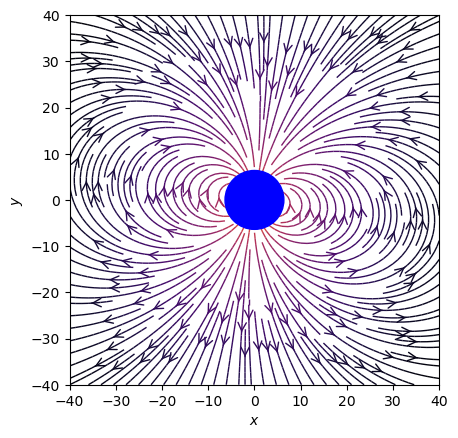

In [ ]:
fig, ax = plt.subplots()

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')
plt.show()

## Solving streamline ODE

https://www.numbercrunch.de/blog/2013/05/visualizing-streamlines/

In [ ]:
from scipy.integrate import ode

In [ ]:
def B_total(x, y, alpha):
    r, lamb = np.hypot(x, y), np.arctan2(y, x)
    Br, Bl = B(r, lamb, alpha)
    c, s = np.cos(lamb), np.sin(lamb)
    Bx = Br * c - Bl * s
    By = Br * s + Bl * c
    return Bx, By

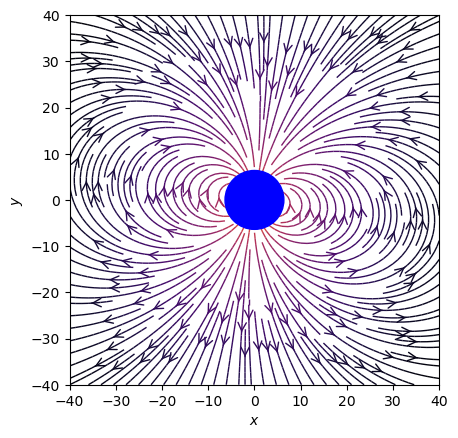

In [ ]:
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)

Bx, By = B_total(X, Y, alpha)

fig, ax = plt.subplots()
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')
plt.show()

In [ ]:
def draw_dipole_field_lines(alpha):

    def streamline(t, y, alpha):
        Bx, By = B_total(y[0], y[1], alpha)
        Bmag = np.hypot(Bx, By)
        return [Bx/Bmag, By/Bmag]
    
    XMAX, YMAX = 40, 40
    x0, x1 = -XMAX, XMAX
    y0, y1 = -YMAX, YMAX

    xmar, ymar = 0.2, 0.2
    xlim1, xlim2 = x0 - xmar*XMAX, x1 + xmar*XMAX
    ylim1, ylim2 = y0 - ymar*YMAX, y1 + ymar*YMAX

    nx = 4
    ny = 4
    x = np.linspace(x0, x1, nx)
    y = np.linspace(y0, y1, ny)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    dt = 0.01
    tmax = 100

    # seed points
    for xv, yv in zip(X.flatten(), Y.flatten()):
        ax.plot(xv, yv, 'ko')

    # quiver
    for xv, yv in zip(X.flatten(), Y.flatten()):
        Bx, By = B_total(xv, yv, alpha)
        ax.quiver(xv, yv, Bx, By, color='k')

    integrator = 'vode'

    R = 0.01

    # forwards
    for xv, yv in zip(X.flatten(), Y.flatten()):
        r = ode(streamline)
        r.set_integrator(integrator)
        r.set_f_params(alpha)
        xp = [xv]
        yp = [yv]
        r.set_initial_value([xp[0], yp[0]], t=0.0)
        while r.successful() and r.t < tmax:
            r.integrate(r.t + dt)
            xp.append(r.y[0])
            yp.append(r.y[1])
            x_inside = x0 < r.y[0]  and r.y[0] < x1
            y_inside = y0 < r.y[1]  and r.y[1] < y1
            distance_from_origin = np.hypot(r.y[0], r.y[1])
            if not x_inside or not y_inside or distance_from_origin < R:
                break
        ax.plot(xp, yp, color='r')
    # backwards
    for xv, yv in zip(X.flatten(), Y.flatten()):
        r = ode(streamline)
        r.set_integrator(integrator)
        r.set_f_params(alpha)
        xp = [xv]
        yp = [yv]
        r.set_initial_value([xp[0], yp[0]], t=0.0)
        while r.successful() and r.t < tmax:
            r.integrate(r.t - dt)
            xp.append(r.y[0])
            yp.append(r.y[1])
            x_inside = x0 < r.y[0]  and r.y[0] < x1
            y_inside = y0 < r.y[1]  and r.y[1] < y1
            distance_from_origin = np.hypot(r.y[0], r.y[1])
            if not x_inside or not y_inside or distance_from_origin < R:
                break
        ax.plot(xp, yp, color='b')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(xlim1, xlim2)
    ax.set_ylim(ylim1, ylim2)
    ax.set_aspect('equal')
    ax.plot([x0, x1, x1, x0, x0], [y0, y0, y1, y1, y0], 'orange')
    plt.show()

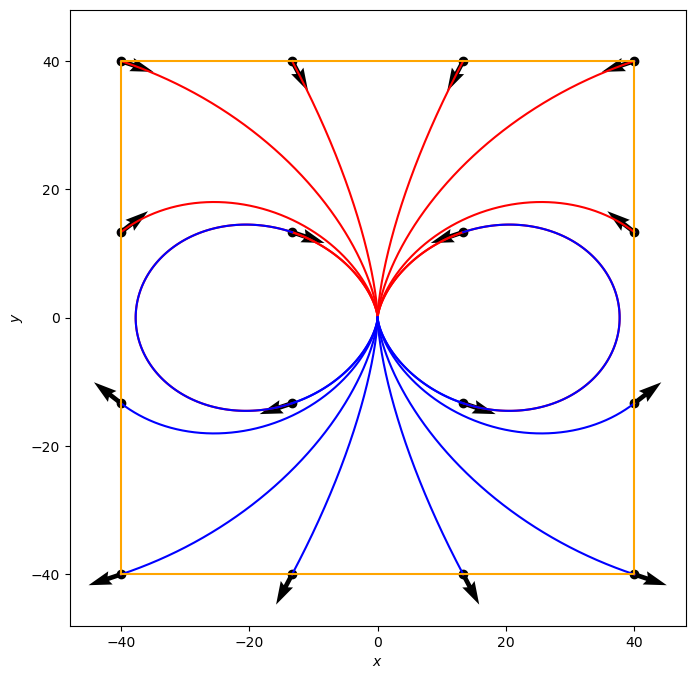

In [ ]:
alpha = 0
draw_dipole_field_lines(alpha)

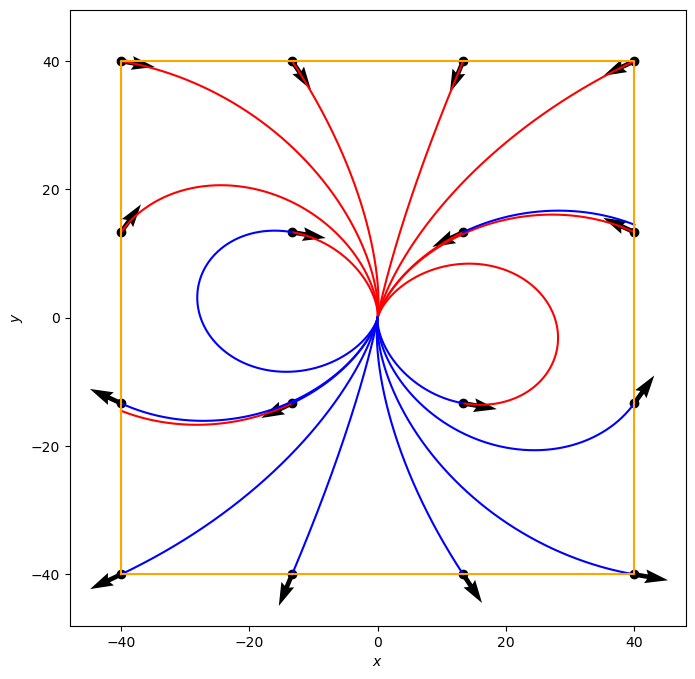

In [ ]:
alpha = np.radians(9.6)
draw_dipole_field_lines(alpha)

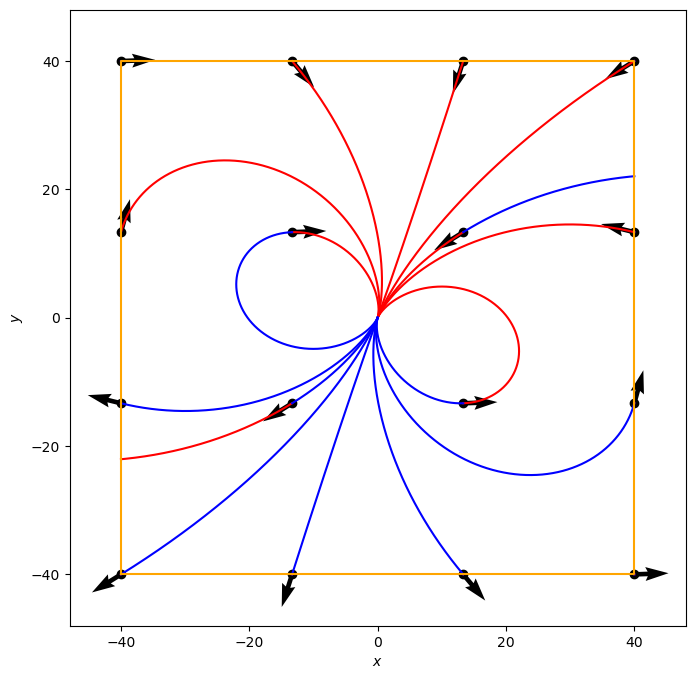

In [ ]:
alpha = np.radians(20)
draw_dipole_field_lines(alpha)